# **Resolución Laboratorio #3**
**Implementación del Algoritmo de Agrupamiento Clustering**

**Integrantes:**

1) Francisco Javier González Alfaro GA101522

2) Francisco López Guardado LG100422

3) David Gilberto Castellanos CC202822

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

## Definimos la lista llamada centers que contiene las coordenadas de 3 clusters. Cada uno representado por una list de dos elemerntos, tambien creamos una lista de datos sinteticos la funcion make_blods generando un conjunto de puntos de aleadios ##

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10500, centers=centers, cluster_std=0.5)

## Se realiza una estimacion de los clusters en un conjunto de datos para el cual utilizaremos el; algoritmo Mean Shift ##

In [ ]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=550)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("El numero estimado de cluster %d" % n_clusters_)

El numero estimado de cluster 3


## trazamos los puntos y los centroides de cada cluster en el grafico ##

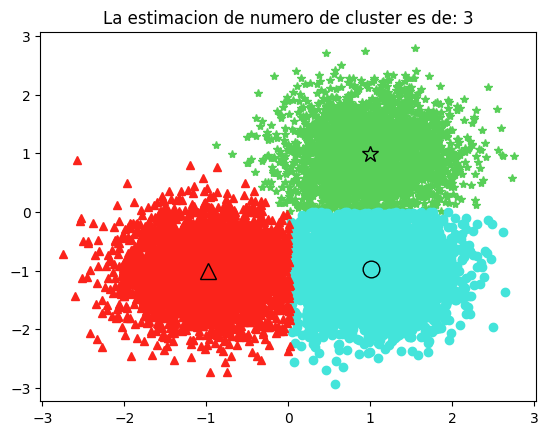

In [ ]:
colors = ["#58cf58", "#43e4da", "#fb231b"]
markers = ["*", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=12,
    )
plt.title("La estimacion de numero de cluster es de: %d" % n_clusters_)
plt.show()

## Analisis
## Teniendo esta grafica determinamos que el Algoritmo Mean Shift es una técnica de clustering y es utilizada para agrupar conjunto de datos clustering o grupos basados en la densidad de los puntos, Se realiza una búsqueda iterativa para encontrar los centroides, con el cual podemos encontrar modas obteniendo puntos atraídos hacia las regiones más densas y los datos dispersos podemos determinar que son datos no comunes o ruido en la información.